#  Welcome to the Rank Choice Lab

**Necessary Imports and Work**

This will read in the necessary data
make sure avengers.csv is in the same directory
as this python file.
You can get the file here: https://raw.githubusercontent.com/mks22-dw/python/main/avengers.csv


avengers.csv represents the results of ranked choice voting
on who should be the leader of the Avengers.

Each line in the file represents a single ballot.
The names in each line represent the ranked choices
separated by commas.
The first name listed is the top choice, second name, second
choice, etc.

In [1]:
# !pip install pprint

In [2]:
from pprint import pprint

In [3]:
text = open('avengers.csv').read().strip()

**Question 0**

See above for a description of that data that should be
in text.
Write a function that will take a string of csv data and
return a list of lists.
Each sublist should represent a single line, with the
values separated by commas.

For example, the first two elements in this list given
the avengers data should be:
   [['Captain America', 'Falcon', 'Black Widow', 'Iron Man', 'Thor'],
    ['Black Widow', 'Thor', 'Falcon', 'Captain America', 'Iron Man'],

In [4]:
def make_lists(s):
    return [[word for word in data_item.split(",")] for data_item in s.split("\n")]


In [5]:
choices = make_lists(text)

# only printing out the first 5 to keep from overloading
# the Thonny shell with data.
pprint(choices[:5])

[['1st Choice', '2nd Choice', '3rd Choice', '4th Choice', '5th Choice'],
 ['Captain America', 'Falcon', 'Black Widow', 'Iron Man', 'Thor'],
 ['Black Widow', 'Thor', 'Falcon', 'Captain America', 'Iron Man'],
 ['Black Widow', 'Falcon', 'Iron Man', 'Captain America', 'Thor'],
 ['Iron Man', 'Black Widow', 'Captain America', 'Falcon', 'Thor']]


In [6]:
#another way to use: pandas
import pandas as pd

pandas_data = pd.read_csv("avengers.csv")
display(pandas_data.head())

,1st Choice,2nd Choice,3rd Choice,4th Choice,5th Choice
0,Captain America,Falcon,Black Widow,Iron Man,Thor
1,Black Widow,Thor,Falcon,Captain America,Iron Man
2,Black Widow,Falcon,Iron Man,Captain America,Thor
3,Iron Man,Black Widow,Captain America,Falcon,Thor
4,Falcon,Thor,Captain America,Iron Man,Black Widow


**Question 1**

In order to do ranked choice voting, we
need to count votes for candidates, focusing on
the specific rank in a given ballot.

This function should take a list of lists, like
what make_lists returns as input.

It should create and return a dictionary where the
keys are the names on the ballots, and the values
are the number of people that voted for that name
in the given rank.

Assume that rank 0 means top choice, rank 1 means second, etc

In [7]:
print(pandas_data.loc[0].iloc[0])
print(pandas_data.shape[0])

Captain America
100


In [8]:
#works with pandas data

def isolate_choice(pandas_data, rank):
    single_choice = {}
    for index in range(pandas_data.shape[0]):
        choice = pandas_data.loc[index].iloc[rank] 
        if choice not in single_choice:
            single_choice[choice] = 1
        else:
            single_choice[choice] += 1
    return single_choice

In [9]:

choice0 = isolate_choice(pandas_data, 0)
pprint(choice0)


# find and print the choices for the last rank
choice4 = isolate_choice(pandas_data, -1)
pprint(choice4)

{'Black Widow': 35,
 'Captain America': 14,
 'Falcon': 25,
 'Iron Man': 9,
 'Thor': 17}
{'Black Widow': 8,
 'Captain America': 8,
 'Falcon': 5,
 'Iron Man': 29,
 'Thor': 50}


**Question 2**

We can create bar graphs to look at the voting data.

This function should take a dictionary like the one returned
in problem 1, and generate a bar graph where the x axis constains
the names of the candidates, and the y axis is their vote count.

In [10]:
# !pip install numpy
# !pip install matplotlib

In [11]:
##imports for matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [12]:
# Use the second parameter as the title for the graph
def choice_bar(choice_data, title):
    l_list, f_list = [],[]
    for label, freq in choice_data.items():
        l_list.append(label)
        f_list.append(freq)
    
    plt.title(title)
    sns.barplot(l_list, f_list) #
    plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


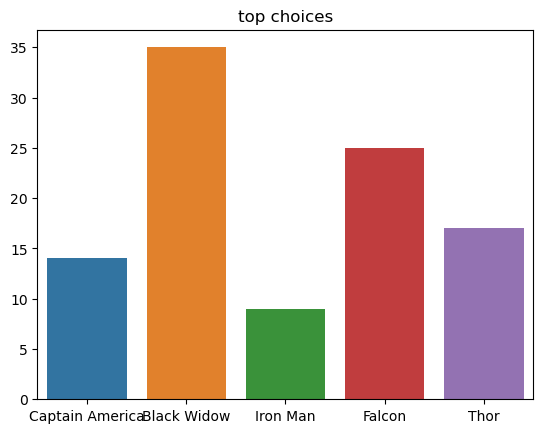

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


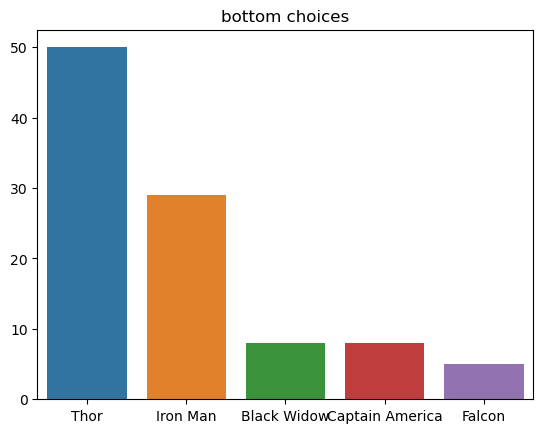

In [13]:
choice_bar(choice0, "top choices")
choice_bar(choice4, "bottom choices")

**Problem 3**

In ranked choice voting, percentages are important.
We can make pie charts to visualize this.

This function should take a dictionary like the one returned
in problem 1, and generate a pie chart where each wedge
represents a specific candidate. The wedges should contain
the vote percentage.

For information on pie charts, go here: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

In [14]:
def choice_pie(choice_data, title):
    l_list, f_list = [],[]
    for label, freq in choice_data.items():
        l_list.append(label)
        f_list.append(freq)

    plt.title(title)
    
    plt.pie(f_list, labels = l_list)
        
    plt.show()

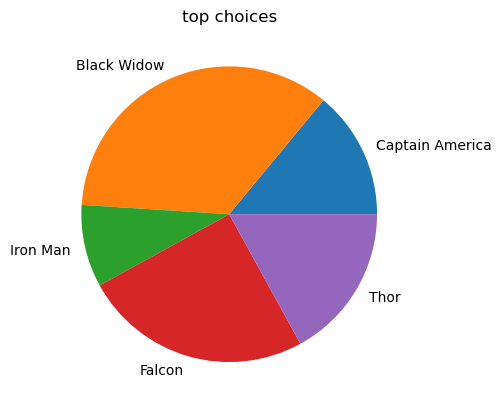

In [15]:
choice_pie(choice0, "top choices")

**Problem 4**

Charts are helpful, but to automate ranked choice voting
we need to calculate the percentages ourselves.

This function should take a dictionary like the one returned
in problem 1 and modify it so the values are no longer vote counts,
but percentages of the total vote

In [16]:
def add_pcts(choice_data):
    sum = 0
    for key in choice_data.keys():
        sum += choice_data[key]

    for key in choice_data.keys():
        choice_data[key] = round(choice_data[key]/sum, 2)  * 100

    return choice_data  

In [17]:
add_pcts(choice0)
# This should print:
# {'Black Widow': 35.0,
#  'Captain America': 14.000000000000002,
#  'Falcon': 25.0,
#  'Iron Man': 9.0,
#  'Thor': 17.0}
pprint(choice0)

{'Black Widow': 35.0,
 'Captain America': 14.000000000000002,
 'Falcon': 25.0,
 'Iron Man': 9.0,
 'Thor': 17.0}


**Problem 5**

When voting, we need to know who got the most votes.

This function should take a dictionary like one that
has been modified by add_pcts, and return a dictionary
with keys 'name', and 'pct', containing the name and
perect vote of the top candidate.

In [18]:
def get_top_choice(choice_data):
    x = 0
    name = ''
    for item in choice_data.keys():
        if choice_data[item] > x:
            x = choice_data[item]
            name = item
    top = {'name':name, 'pct': x}
    return top

In [19]:
top_choice = get_top_choice(choice0)
# should print:
# winner: {'name': 'Black Widow', 'pct': 35.0}
print("winner:", top_choice)

winner: {'name': 'Black Widow', 'pct': 35.0}


For ranked choice voting, it is also important to find
the candidate with the fewest votes.

This function should take a dictionary like one that
has been modified by add_pcts, and return a dictionary
with keys 'name', and 'pct', containing the name and
perect vote of the bottom candidate.

In [20]:
def get_bottom_choice(choice_data):
    min = 100
    name = ''
    for item in choice_data.keys():
        if choice_data[item] < min:
            min = choice_data[item]
            name = item
    bottom = {'name':name, 'pct': min}
    return bottom

In [21]:
bottom_choice = get_bottom_choice(choice0)
# should print:
# last place: {'name': 'Iron Man', 'pct': 9.0}
print('last place:', bottom_choice)

last place: {'name': 'Iron Man', 'pct': 9.0}


**Problem 6**

In ranked choice voting, we need to be able to
remove all votes for the last place candidate.

This function should create a new list that is
almost identical to the one generated by make_lists
(problem 0), except it will not contain any values
equal to the option parameter.

For example, if Iron Man were given as option, then
this function would create a new ballot list of
lists, without any votes for Iron Man, but leaving
everything else, and not changing the order.

In [22]:
choices

[['1st Choice', '2nd Choice', '3rd Choice', '4th Choice', '5th Choice'],
 ['Captain America', 'Falcon', 'Black Widow', 'Iron Man', 'Thor'],
 ['Black Widow', 'Thor', 'Falcon', 'Captain America', 'Iron Man'],
 ['Black Widow', 'Falcon', 'Iron Man', 'Captain America', 'Thor'],
 ['Iron Man', 'Black Widow', 'Captain America', 'Falcon', 'Thor'],
 ['Falcon', 'Thor', 'Captain America', 'Iron Man', 'Black Widow'],
 ['Black Widow', 'Falcon', 'Iron Man', 'Captain America', 'Thor'],
 ['Black Widow', 'Iron Man', 'Falcon', 'Captain America', 'Thor'],
 ['Captain America', 'Falcon', 'Black Widow', 'Thor', 'Iron Man'],
 ['Captain America', 'Falcon', 'Black Widow', 'Iron Man', 'Thor'],
 ['Falcon', 'Thor', 'Captain America', 'Black Widow', 'Iron Man'],
 ['Black Widow', 'Falcon', 'Falcon', 'Falcon', 'Thor'],
 ['Black Widow', 'Captain America', 'Falcon', 'Iron Man', 'Thor'],
 ['Thor', 'Falcon', 'Thor', 'Thor', 'Thor'],
 ['Black Widow', 'Falcon', 'Iron Man', 'Captain America', 'Thor'],
 ['Thor', 'Black Widow

In [23]:
def remove_option(data, option):
    new_data = []
    for ballot in data:
        copy_ballot = ballot.copy()
        while option in copy_ballot:
            copy_ballot.remove(option)
        new_data.append(copy_ballot)
    return new_data

In [24]:
choices = remove_option(choices, bottom_choice['name'])
# The printed list should not contain Iron Man
pprint(choices[:5])

[['1st Choice', '2nd Choice', '3rd Choice', '4th Choice', '5th Choice'],
 ['Captain America', 'Falcon', 'Black Widow', 'Thor'],
 ['Black Widow', 'Thor', 'Falcon', 'Captain America'],
 ['Black Widow', 'Falcon', 'Captain America', 'Thor'],
 ['Black Widow', 'Captain America', 'Falcon', 'Thor']]


**Problem 7**

In problem 6, we removed Iron Man, let's see
how things changes.

In [25]:
def isolate_choice_non_pandas(data, rank):
    single_choice = {}
    for index in range(1, len(data)):
        choice = data[index][rank] 
        if choice not in single_choice:
            single_choice[choice] = 1
        else:
            single_choice[choice] += 1
    return single_choice

In [26]:
# First, recalcualte the the top choice votes.
choice_data = isolate_choice_non_pandas(choices, 0)
pprint(choice_data)


{'Black Widow': 38, 'Captain America': 19, 'Falcon': 26, 'Thor': 17}


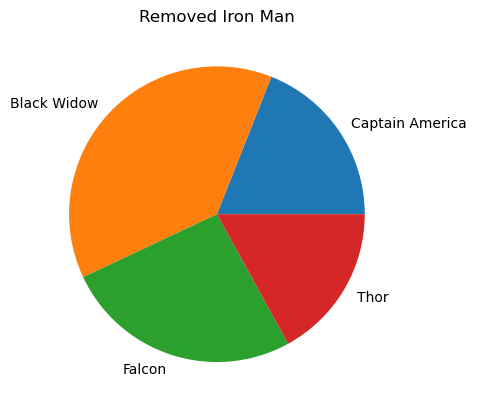

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


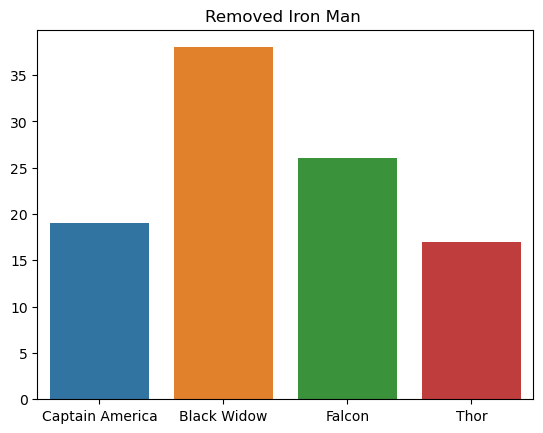

In [27]:
# Now display a bar and pie graphs of the new results.

choice_pie(choice_data, "Removed Iron Man")
choice_bar(choice_data, "Removed Iron Man ")

In [28]:
# Calculate precentages for the new results

pprint(add_pcts(choice_data))

{'Black Widow': 38.0, 'Captain America': 19.0, 'Falcon': 26.0, 'Thor': 17.0}


**Problem 8**

Now, let's automate the ranked choice voting
process.

This function should:
    get the choices for rank 0
    display a bar graph of them: include the number of removed candidates in the title
    display a pie chart of them: include the number of removed candidates in the title
    calculate the percentages
    find the top choice
    find the bottom choice
    print out the bottom choice
    remove the bottom choice
    repeat all these steps until the top choice has over 50% of the vote
    At the end, return the top choice winner

In [29]:
# First off, lets reset the data since it has been
# modified for prior tests.

text = open('avengers.csv').read().strip()
choices = make_lists(text)

In [45]:
def ranked_choice_voting(data):
    choice0 = add_pcts(isolate_choice_non_pandas(data,  0))
    while get_top_choice(choice0)["pct"] < 50:
        data = remove_option(data, get_bottom_choice(choice0)["name"])
        data = [item for item in data if item != []]
        choice0 = add_pcts(isolate_choice_non_pandas(data,  0))
    top_choice = {'name': get_top_choice(choice0)["name"], 'pct': get_top_choice(choice0)["pct"]}
    return top_choice


In [46]:
winner = ranked_choice_voting(choices)
pprint(winner)

{'name': 'Falcon', 'pct': 51.0}
